In [1]:
from IPython.core.display import HTML
css = HTML("""
<style>
.jp-Cell.jp-MarkdownCell {
    max-width: 900px;
    margin-left: 100px;
    box-shadow: rgba(99, 99, 99, 0.2) 0px 2px 8px 0px;
    padding-bottom: 20px;
}
.jp-MarkdownOutput > :not(h1, h2, h3, table) {
  margin-left: 50px;
  margin-right: 50px;
}
</style>""")
display(css)

In [2]:
import sys
from typing import Iterable

import matplotlib.pyplot as plt

def not_implemented(cls, *args, **kwargs):
    raise NotImplementedError

class RemoveMethods(type):
    def __new__(mcls, name, bases, attrs):
        cls = super().__new__(mcls, name, bases, attrs)
        builtins_to_deactivate = {"__add__","__radd__", "append", "extend", "insert", "pop", "reverse", "sort", "__contains__", "remove", "__delitem__", "__iter__", "__len__" }
        for method in builtins_to_deactivate  - attrs.keys():
            setattr(cls, method, not_implemented)
        return cls

In [3]:
sys.setrecursionlimit(15_000)

# Introduction

> Deux amis de longue date, Bric et Brac, ont ouvert deux magasins concurrente.
> 
> Bric dispose d'une grande étagère, qui permet de ranger chaque object dans un emplacement dédié.
>
> De son coté, Brac a ouvert son magasin au dessus d'un grand trou, qu'il compte utiliser pour stocker ses marchandises. Il a mis au point un système de boites, chaque boite étant reliée à la boite précédente par un crochet

<table> 
<tr>
    <th>Étagère de Bric</th>
    <th>Système de Brac</th>
</tr>

<tr>
    <td>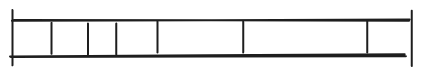</td>
    <td>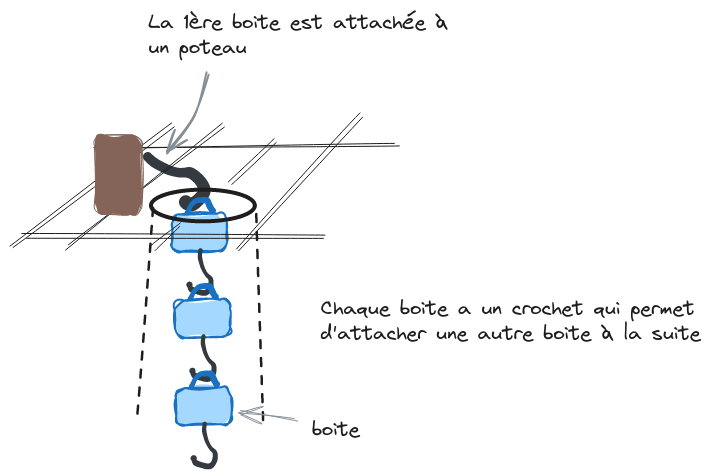</td>
</tr>

</table>


<!-- 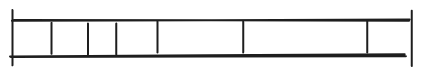 -->
<!-- 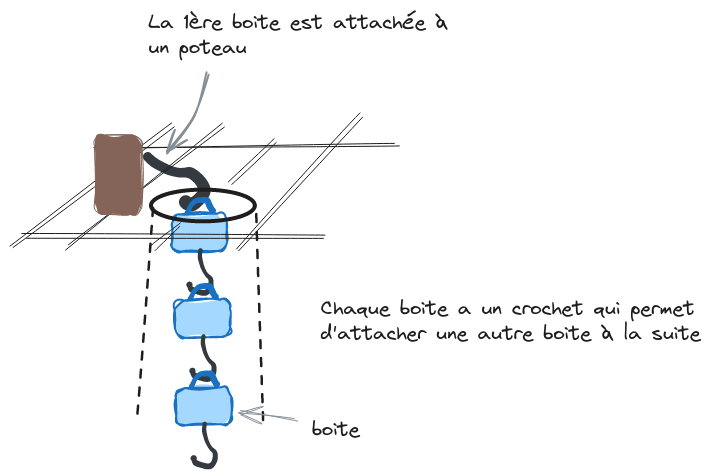 -->

Dans ce TD, nous allons étudier différentes stratégies de rangement de marchandises.

Pour ce faire, nous allons définir des structures de données très simples. Le but est de manipuler et d'étudier ces structures de données, afin de nous permettre faire d'obtenir les propriétés désirées en terme de:

- utilisation CPU (i.e. temps de calcul)
- utilisation mémoire (i.e. quantité de RAM utilisée)


Note: on utilisera des chaînes de caractère pour représenter les objets stockés.
# Magasin de Bric

## Étagère

<div style="float: right">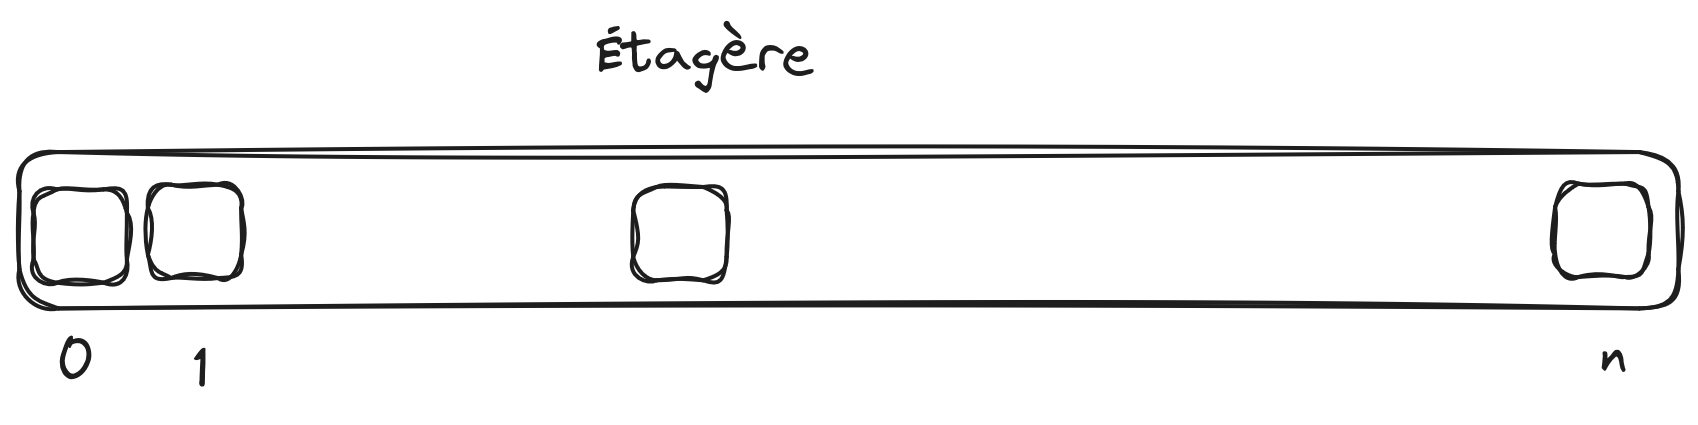</div>

<!-- 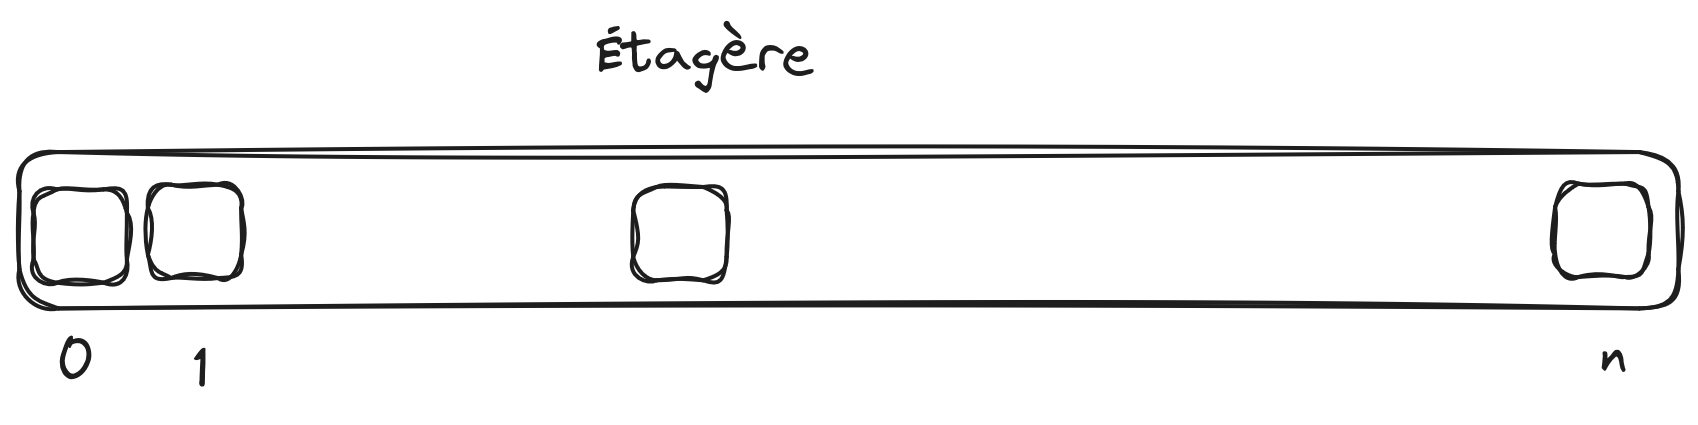 -->

Une étagère permet de ranger des éléments, et à accéder à chacun d'entre eux immédiatement.

Une fois qu'une étagère a été construite, on ne peut plus modifier sa taille.

**Note:** on utilisera la valeur `None` pour désigner un emplacement vide.

In [4]:
class Étagère(list[str], metaclass=RemoveMethods):
    """Classe pour une étagère. Il n'y a pas besoin de s'intéresser au code."""
    def __init__(self, capacité: int):
        super().__init__([None] * capacité)
        self.capacité = capacité
        
    def _repr_html_(self):
        """Sert à afficher l'objet dans un environnement jupyter"""
        def row(values):
            return "".join(f"<td>{value}</td>" for value in values)
        return f"""
        <style> table, th, td {{ border: 1px solid black !important; }} </style>
        <table>
            <tr><th>indice</th>{row(range(self.capacité))}</tr>
            <tr><th>valeur</th>{row(self[i] for i in range(self.capacité))}</tr>
        </table>
        """


### Exemples

Utilisation d'une étagère

In [5]:
# Instantiation: on crée une étagère avec 5 emplacements
a = Étagère(5)
a

indice,0,1,2,3,4
valeur,None,None,None,None,None


In [6]:
# accès à un élément
print(a[3])

None


In [7]:
# Modification d'un élément
a[3] = 2
a[3]

2

In [8]:
a

indice,0,1,2,3,4
valeur,None,None,None,2,None


## Magasin avec étagère

Bric emploie une méthode simple pour ranger ses livres: à chaque fois qu'il reçoit un nouveau livre, il le range au premier emplacement vide.

### Exercice

Enrichir la classe Étagère avec les méthodes suivantes, afin de permettre à Bric de l'utiliser comme librairie:

In [11]:
class Étagère(Étagère):
    def nb_items(self) -> int:
        """Nombre d'éléments du tableau qui ne sont pas None"""
        #BEGIN
        res : int = 0
        for i in range(self.capacité):
            if self[i] is not None:
                res += 1
        return res
        #END

    def add(self, value: str):
        """
        Ajoute value dans la première case libre du tableau
        Lève une exception si plus de place
        """
        #BEGIN
        for i in range(self.capacité):
            if self[i] is None:
                self[i] = value
                return
        raise Exception("Plus de place")
        #END

    def remove(self, value):
        """
        Supprime la première case égale à value
        Lève une exception si pas trouvée
        """
        #BEGIN
        for i in range(self.capacité):
            if self[i] == value:
                self[i] = None
                return
        raise Exception("Pas trouvé")
        #END

    @staticmethod
    def from_values(
        capacité,
        values
    ):
        res = Étagère(capacité=capacité)
        for i, value in enumerate(values):
            res.add(value)
        return res

### Vérifications

Si les méthodes ci-dessus sont implémentées correctement, le cellules ci-dessous doivent s'exécuter sans erreur (et sans modifications)

**Note:** En cas de problème, ne pas hésiter à créer de nouvelles cellules pour débugger

In [12]:
lbric = Étagère.from_values(capacité = 5, values=["aaa", "avx", "xyz"])

assert (
    lbric[0] == "aaa"
    and lbric[1] == "avx" 
    and lbric[2] == "xyz"
    and lbric[3] == None
)
assert lbric.nb_items() == 3
lbric

indice,0,1,2,3,4
valeur,aaa,avx,xyz,None,None


In [13]:
lbric = Étagère.from_values(capacité = 5, values=["aaa", "avx", "xyz"])
print("On insère 'cde' dans la librairie")
lbric.add("cde")

assert lbric[3] == "cde"
assert lbric.nb_items() == 4

lbric

On insère 'cde' dans la librairie


indice,0,1,2,3,4
valeur,aaa,avx,xyz,cde,None


In [14]:
lbric = Étagère.from_values(capacité = 5, values=["aaa", "avx", "xyz"])
print("On supprime avx de la librairie")
lbric.remove("avx")

assert lbric[1] is None
assert lbric.nb_items() == 2

lbric

On supprime avx de la librairie


indice,0,1,2,3,4
valeur,aaa,None,xyz,None,None


# Magasin de Brac

## Liste chaînée

Pour modéliser le magasin de Brac, nous allons utiliser une structure de données appelée *"Liste chaînée"*.

Une liste chaînée est constitée:
- d'une tête de liste, à laquelle on peut attacher un élément (qu'un apellera ici `Node` )
- d'un ensemble d'éléments reliés ensemble. Chaque élément peut contenir une valeur

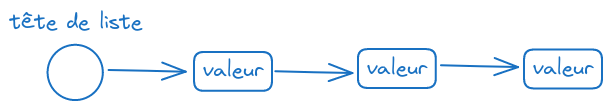

Voici une implémentation minimale d'une classe Liste:

### Implémentation

On commence par définir une class `Node`, qui correspond aux boites.

In [17]:
class Node:
    def __init__(self, value, next: "Node" | None = None):
        self.value = value
        self.next = next

    def __repr__(self):
        return f"Node<{self.value}, {self.next}>"

    def __eq__(self, other):
        if not isinstance(other, Node):
            return False
        return self.value == other.value and self.next == other.next

TypeError: unsupported operand type(s) for |: 'str' and 'NoneType'

In [ ]:
Node(value="dentifrice")

In [ ]:
Node(
    value="dentifrice",
    next=Node("brosse à dent")
)

On définit ensuite la classe List.  L'élément essentiel est l'attribut `head`, qui permet de relier un premier élément.

On ajoute aussi des méthodes qui correspondent aux propriétés suivantes
- Si aucun élément n'est relié, la liste est vide
- Deux listes qui contiennent les mêmes éléments, dans le même ordre, sont égales

In [ ]:
class List:
    def __init__(self, head: Node | None = None):
        self.head = head

    @property
    def is_empty(self) -> bool:
        return self.head is None
        
    def __eq__(self, other):
        if not isinstance(other, List):
            return False
        return self.head == other.head
        
    def _repr_html_(self):
        """Sert à afficher l'objet dans un environnement jupyter"""
        res = ""
        current_head = self.head
        while current_head is not None:
            res += str(current_head.value) + " ⟶ "
            current_head = current_head.next
        res += "■"
        return res
        
    def __radd__(self, value):
        """Sert à manipuler des listes plus facilement"""
        if isinstance(value, List):
            raise NotImplementedError
        return List(
            Node(value, self.head)
        )


In [ ]:
# Liste vide
List()

In [ ]:
List(Node("dentifrice"))

In [ ]:
List(
    Node("dentifrice", 
         Node("Brosse à dent")))

Enfin nous définissons une classe EmptyList, qui servira à créer un object EMPTY qui ne pourra pas être modifié, dont nous verrons l'intérêt par la suite.  

In [ ]:
class EmptyList(List):
    def __init__(self):
        self.head = None
    def __setattr__(self, key, value):
        if hasattr(self, "head"):
            raise Exception("Object is frozen")
        super().__setattr__(key, value)

EMPTY = EmptyList()

EMPTY

In [ ]:
# EMPTY est bien égal à une liste vide
EMPTY == List()

### Exemples d'utilisation

On pourra utiliser l'objet EMPTY pour créer facilement des listes "à la main" (grace à la méthode `List.__radd__`).

In [ ]:
(3 + EMPTY)

In [ ]:
2 + (3 + EMPTY)

In [ ]:
2 + (3 + EMPTY) == 2 + (3 + EMPTY)

### Exemple: longueur d'une liste

Nous allons présenter deux méthodes pour calculer la longueur d'une liste


In [ ]:
# Méthode avec boucle while

def longueur_while(liste: List):
    current_len = 0
    current_head = liste.head
    while current_head is not None:
        current_len += 1
        current_head = current_head.next
    return current_len

In [ ]:
print(longueur_while( EMPTY))
print(longueur_while( "a" + EMPTY))
print(longueur_while( "c" + ("b" + ("a" + EMPTY))))

In [ ]:
# Méthode avec fonction récursive

def longueur_recursive(liste: List):
    if liste.is_empty:
        return 0

## Exercices

In [ ]:
def get_head(liste: List) -> :
    """Retourne la première valeur de la liste (ou None si la liste est vide)"""

In [ ]:
def longueur(liste: List) -> int:
    """Retourne le nombre d'éléments dans la liste"""

In [ ]:
def get_nth(liste: List, n: int):
    """Retourne la n-ème  valeur de la liste (ou None si la liste)"""

In [ ]:
def ajoute_devant(value, liste):
    """Modifie la liste: ajoute un noeud avec la valeur `value` en tête de liste"""

In [ ]:
def ajoute_derrière(liste: List, value):
    """Modifie la liste: ajoute la valeur value à la fin de la liste"""
    if liste.is_empty:
        liste.head = Node(value, None)
    else:
        return liste.value + ajout(liste.next, value)

ajout((1 + EMPTY), 3)

## Exercices 

Enrichir la classe List avec les méthodes suivantes, afin de permettre à Brac de l'utiliser comme librairie:

In [ ]:
class List(List):
    def nb_elements(self):
        #BEGIN
        if self.is_empty:
            return 0
        return 1 + self.next.nb_elements()
        #END

    def ajout_livre(self, value: str):
        """
        Ajoute value dans la première case libre du tableau
        Lève une exception si plus de place
        """
        #BEGIN
        if self.is_empty:
            self.value = value
            self.is_empty 
        for i in range(self.capacité):
            if self[i] is None:
                self[i] = value
                return
        raise Exception("Plus de place")
        #END

    def remove(self, value):
        """
        Supprime la première case égale à value
        Lève une exception si pas trouvée
        """
        #BEGIN
        for i in range(self.capacité):
            if self[i] == value:
                self[i] = None
                return
        raise Exception("Pas trouvé")
        #END

    @staticmethod
    def from_values(
        capacité,
        values
    ):
        res = Étagère(capacité=capacité)
        for i, value in enumerate(values):
            res.ajout_livre(value)
        return res
    
    @staticmethod
    def from_values(values):
        res = List()
        for value in values:
            res.insert(0, value)
        return res

In [ ]:
l = List()
l.insert(0, 4)
display(l)
l.insert(0, 5)
display(l)
l.insert(1, 3)
display(l)
l.nb_elements()

In [ ]:
3 in l

In [ ]:
6 in l

In [ ]:
l.remove(1)
l

# Problème

Deux libraires concurrents veulent créer une base de données de leurs livres. Pour cela, l'un veut utiliser une liste, l'autre un tableau.

La base de données servira à connaître rapidement si un livre est disponible ou non. Régulièrement, des livres seront ajoutés, et les peuvent aussi être vendus.

Quelle base de données sera la plus rapide pour effectuer ces opérations ?

**Instruction:** Mesurer les temps pour
- ajouter un livre
- savoir si un livre est dans la librairie

pour des librairies de taille 1000, 2000, 5000 et 10000

In [ ]:
import time
import random
import string

def random_title(length: int):
    return "".join(random.choice(string.ascii_letters) for _ in range(length))


all_books = [random_title(10) for _ in range(10_000)]
to_insert = [random_title(10) for _ in range(100)]
to_search = [random_title(10) for _ in range(100)]

def make_list(size: int):
    return List.from_values(initial_data[0:size])

def make_array(size: int):
    return Array.from_values(initial_data[0:size])

In [ ]:
def benchmark_insert(Klass, nb_items: int):
    librairie = Klass.from_values(all_books[0:nb_items])
    
    start_time = time.perf_counter()
    for value in to_insert:
        librairie.insert(0, value)
    end_time = time.perf_counter()

    print(f"({nb_items}, {end_time - start_time}), # insertion {Klass.__name__}")

def benchmark_contains(Klass, nb_items: int):
    librairie = Klass.from_values(all_books[0:nb_items])

    start_time = time.perf_counter()
    for value in to_search:
        value in librairie
    end_time = time.perf_counter()

    print(f"({nb_items}, {end_time - start_time}), # recherche {Klass.__name__}")
        
        

In [ ]:
benchmark_insert(List, 1000)
benchmark_insert(List, 2000)
benchmark_insert(List, 5000)
benchmark_insert(List, 10000)

In [ ]:
benchmark_insert(Array, 1000)
benchmark_insert(Array, 2000)
benchmark_insert(Array, 5000)
benchmark_insert(Array, 10000)

In [ ]:
def affiche_valeurs(titre: str = None, **kwargs: list[tuple[int, int]]):
    """Affiche les valeurs passées en argument"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    for name, values in kwargs.items():
        xs = [value[0] for value in values]
        ys = [value[1] for value in values]
        ax.plot(xs, ys, "o-", label=name)
    fig.legend()
    ax.grid()
    ax.set_xlabel("Taille de l'entrée")
    ax.set_ylabel("Temps d'exécution (s)")
    if titre is not None:
        ax.set_title(titre)

In [ ]:

affiche_valeurs(
    titre="Temps pour 100 insertions",
    liste=(
(1000, 3.711800673045218e-05), # insertion List
(2000, 8.625599730294198e-05), # insertion List
(5000, 3.944999480154365e-05), # insertion List
(10000, 3.821800055447966e-05), # insertion List
    ),
    array=(
(1000, 0.015094153000973165), # insertion Array
(2000, 0.030815688995062374), # insertion Array
(5000, 0.07496714200533461), # insertion Array
(10000, 0.15300821499840822), # insertion Array
    )
)

In [ ]:
benchmark_contains(List, 1000)
benchmark_contains(List, 2000)
benchmark_contains(List, 5000)
benchmark_contains(List, 10000)

In [ ]:
benchmark_contains(Array, 1000)
benchmark_contains(Array, 2000)
benchmark_contains(Array, 5000)
benchmark_contains(Array, 10000)

In [ ]:
affiche_valeurs(
    titre="Temps pour 100 recherches",
    liste=(
(1000, 0.014344584007631056), # recherche List
(2000, 0.02990555299038533), # recherche List
(5000, 0.06645613399450667), # recherche List
(10000, 0.21083943199482746), # recherche List
    ),
    array=(
(1000, 0.007048465005937032), # recherche Array
(2000, 0.01569576800102368), # recherche Array
(5000, 0.03817352600162849), # recherche Array
(10000, 0.07036486100696493), # recherche Array  
    )
)

# Liste sans Empty

In [ ]:
class Node:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

    def __repr__(self):
        if self.next is None:
            return f"Node({self.value}, None)"
        else:
            return f"Node({self.value}, <Node:{id(self.next)}>)"

class List:
    def __init__(self, head=None):
        self.head : None | Node = head

    @property
    def is_empty(self) -> bool:
        return self.head is None
        
    def _repr_html_(self):
        res = ""
        current_head = self.head
        while current_head is not None:
            res += str(current_head.value) + " ⟶ "
            current_head = current_head.next
        res += "■"
        return res

    def __eq__(self, other):
        if not isinstance(other, List):
            return False

        if self.is_empty or other.is_empty:
            return self.is_empty == other.is_empty
        if self.value != other.value:
            return False
        return self.next == other.next

    def __repr__(self):
        if self.head is None:
            return "■"
        else:
            return str(self.head)
        
    def __radd__(self, value):
        if isinstance(value, List):
            raise NotImplementedError
        return List(
            Node(value, self.head)
        )
EMPTY = List()

In [ ]:
3 + EMPTY

In [ ]:
2 + (3 + EMPTY)

In [ ]:
Node(4, Node(3, None))